<a href="https://colab.research.google.com/github/DolevSeren/DI-Bootcamp/blob/main/Supervised%20Machine%20Learning%20%3A%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [29]:
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
case_counts = df['diabetes'].value_counts()
case_counts

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [43]:
df_encoded = pd.get_dummies(df, columns= ['gender', 'smoking_history'], drop_first=True)

x = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

x_train.shape, x_test.shape, y_train.value_counts(), y_text.value_counts()

((80000, 13),
 (20000, 13),
 diabetes
 0    73208
 1     6792
 Name: count, dtype: int64,
 diabetes
 0    18292
 1     1708
 Name: count, dtype: int64)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled
x_test_scaled

array([[-1.28824683, -0.28630923, -0.20355869, ..., -0.32187031,
        -0.73511021, -0.26293117],
       [-1.73274126, -0.28630923, -0.20355869, ..., -0.32187031,
        -0.73511021, -0.26293117],
       [ 0.93422533, -0.28630923, -0.20355869, ...,  3.10684138,
        -0.73511021, -0.26293117],
       ...,
       [ 0.31193312, -0.28630923, -0.20355869, ..., -0.32187031,
         1.36034024, -0.26293117],
       [ 1.37871976, -0.28630923,  4.9125881 , ..., -0.32187031,
        -0.73511021, -0.26293117],
       [ 0.04523647, -0.28630923, -0.20355869, ..., -0.32187031,
         1.36034024, -0.26293117]])

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(x_train_scaled, y_train)

train_accuracy = logreg_model.score(x_train_scaled, y_train)

test_accuracy = logreg_model.score(x_test_scaled, y_text)

train_accuracy, test_accuracy

(0.96075, 0.95905)

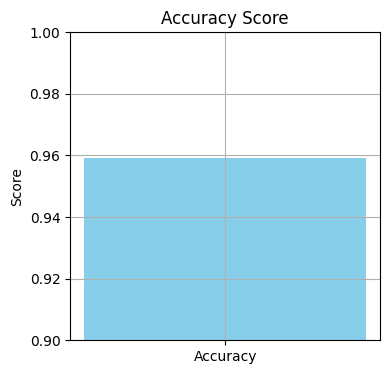

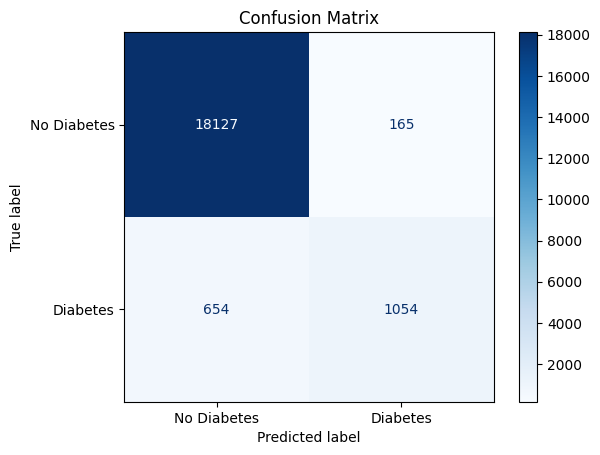

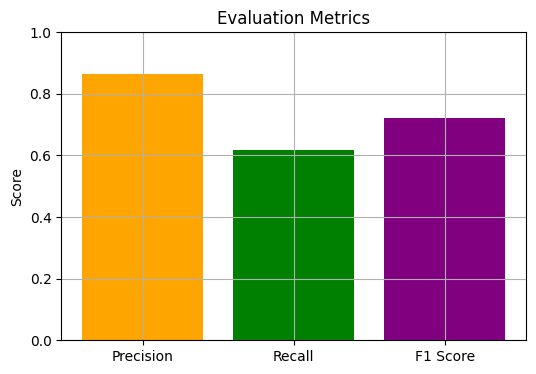

'              precision    recall  f1-score   support\n\n No Diabetes       0.97      0.99      0.98     18292\n    Diabetes       0.86      0.62      0.72      1708\n\n    accuracy                           0.96     20000\n   macro avg       0.91      0.80      0.85     20000\nweighted avg       0.96      0.96      0.96     20000\n'

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, precision_score, recall_score, f1_score
)

# ◊†◊ô◊ë◊ï◊ô (◊ó◊ô◊ñ◊ï◊ô) ◊¢◊ú ◊°◊ò ◊î◊ë◊ì◊ô◊ß◊î
y_pred = logreg_model.predict(x_test_scaled)

# ◊ó◊ô◊©◊ï◊ë ◊û◊ì◊ì◊ô◊ù
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ◊í◊®◊£ ◊ì◊ô◊ï◊ß (Accuracy)
plt.figure(figsize=(4, 4))
plt.bar(["Accuracy"], [accuracy], color="skyblue")
plt.ylim(0.9, 1.0)
plt.title("Accuracy Score")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# ◊û◊ò◊®◊ô◊¶◊™ ◊ë◊ú◊ë◊ï◊ú (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# ◊í◊®◊£ ◊©◊ú Precision, Recall, F1
plt.figure(figsize=(6, 4))
metrics = [precision, recall, f1]
labels = ["Precision", "Recall", "F1 Score"]
plt.bar(labels, metrics, color=["orange", "green", "purple"])
plt.ylim(0, 1.0)
plt.title("Evaluation Metrics")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# ◊ì◊ï"◊ó ◊û◊ú◊ê
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
report


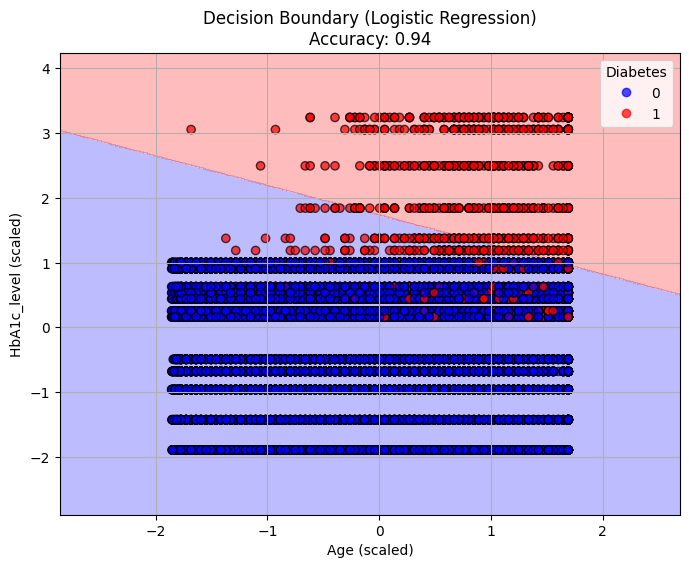

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ◊†◊ô◊ß◊ó ◊®◊ß ◊ê◊™ ◊©◊†◊ô ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊©◊†◊®◊¶◊î ◊ú◊®◊ê◊ï◊™ ◊¢◊ú ◊î◊í◊®◊£
features = ['age', 'HbA1c_level']
X_vis = df[features]
y_vis = df['diabetes']

# ◊°◊ß◊ú◊™ ◊†◊™◊ï◊†◊ô◊ù
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# ◊§◊ô◊¶◊ï◊ú ◊ú-train/test
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vis_scaled, y_vis, test_size=0.2, random_state=42)

# ◊ê◊ô◊û◊ï◊ü ◊û◊ï◊ì◊ú ◊ú◊ï◊í◊ô◊°◊ò◊ô ◊®◊ß ◊¢◊ú 2 ◊î◊¢◊û◊ï◊ì◊ï◊™
model_vis = LogisticRegression()
model_vis.fit(Xv_train, yv_train)

# ◊ô◊¶◊ô◊®◊™ ◊®◊©◊™ ◊†◊ß◊ï◊ì◊ï◊™ ◊¢◊ë◊ï◊® ◊î◊û◊ó◊©◊î ◊©◊ú ◊í◊ë◊ï◊ú ◊î◊î◊ó◊ú◊ò◊î
x_min, x_max = Xv_train[:, 0].min() - 1, Xv_train[:, 0].max() + 1
y_min, y_max = Xv_train[:, 1].min() - 1, Xv_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_vis.predict(grid).reshape(xx.shape)

# ◊ó◊ô◊©◊ï◊ë ◊ì◊ô◊ï◊ß
acc = accuracy_score(yv_test, model_vis.predict(Xv_test))

# ◊¶◊ô◊ï◊® ◊í◊ë◊ï◊ú ◊î◊î◊ó◊ú◊ò◊î
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs, alpha=0.3, cmap='bwr')
scatter = plt.scatter(Xv_test[:, 0], Xv_test[:, 1], c=yv_test, cmap='bwr', edgecolors='k', alpha=0.7)
plt.xlabel("Age (scaled)")
plt.ylabel("HbA1c_level (scaled)")
plt.title(f"Decision Boundary (Logistic Regression)\nAccuracy: {acc:.2f}")
plt.legend(*scatter.legend_elements(), title="Diabetes")
plt.grid(True)
plt.show()


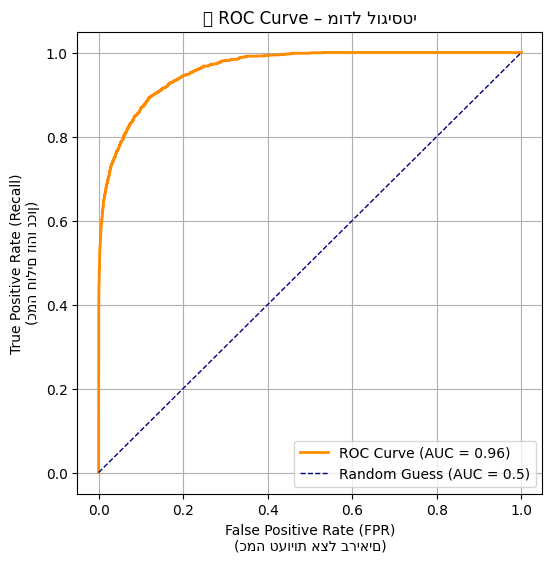

In [47]:
from sklearn.metrics import roc_curve, auc

# ◊†◊ó◊©◊ë ◊ê◊™ ◊î◊î◊°◊™◊ë◊®◊ï◊ô◊ï◊™ ◊©◊ú ◊î◊û◊ï◊ì◊ú ◊ú◊í◊ë◊ô ◊û◊ó◊ú◊™ ◊°◊ï◊õ◊®◊™ (◊¢◊®◊õ◊ô◊ù ◊ë◊ô◊ü 0 ◊ú-1)
y_prob = logreg_model.predict_proba(x_test_scaled)[:, 1]

# ◊†◊ó◊©◊ë ◊ê◊™ ◊¢◊®◊õ◊ô ◊î-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# ◊†◊ó◊©◊ë ◊ê◊™ ◊î◊©◊ò◊ó ◊û◊™◊ó◊™ ◊ú◊¢◊ß◊ï◊û◊î (AUC)
roc_auc = auc(fpr, tpr)

# ◊†◊¶◊ô◊ô◊® ◊ê◊™ ◊¢◊ß◊ï◊û◊™ ◊î-ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="Random Guess (AUC = 0.5)")
plt.xlabel('False Positive Rate (FPR)\n(◊õ◊û◊î ◊ò◊¢◊ï◊ô◊ï◊™ ◊ê◊¶◊ú ◊ë◊®◊ô◊ê◊ô◊ù)')
plt.ylabel('True Positive Rate (Recall)\n(◊õ◊û◊î ◊ó◊ï◊ú◊ô◊ù ◊ñ◊ï◊î◊ï ◊†◊õ◊ï◊ü)')
plt.title('üéØ ROC Curve ‚Äì ◊û◊ï◊ì◊ú ◊ú◊ï◊í◊ô◊°◊ò◊ô')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
